In [ ]:
# Install necessary libraries
# !pip install pandas

import pandas as pd

# Step 1: Data Preprocessing

# Load raw data (assuming it's in a CSV file)
data_path = '/content/drive/MyDrive/Senior_codes/finaldata.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
print("Original Data:")
print(df.head())

# Remove irrelevant information
df = df[['cases', 'department']]

# Handle missing data if needed
df = df.dropna()

# Display the cleaned data
print("\nCleaned Data:")
print(df.head())

# Save the cleaned data to a new CSV file if needed
cleaned_data_path = '/content/drive/MyDrive/Senior_codes/cleaned_data.csv'
df.to_csv(cleaned_data_path, index=False)
print(f"\nCleaned data saved to {cleaned_data_path}")


Original Data:
              department                                              cases
0   Allergy / Immunology  HISTORY:,  A 55-year-old female presents self-...
1   Allergy / Immunology  ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
2   Allergy / Immunology  HISTORY: , A 34-year-old male presents today s...
3   Allergy / Immunology  HISTORY:,  I had the pleasure of meeting and e...
4   Allergy / Immunology  SUBJECTIVE:,  This 23-year-old white female pr...

Cleaned Data:
                                               cases             department
0  HISTORY:,  A 55-year-old female presents self-...   Allergy / Immunology
1  ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...   Allergy / Immunology
2  HISTORY: , A 34-year-old male presents today s...   Allergy / Immunology
3  HISTORY:,  I had the pleasure of meeting and e...   Allergy / Immunology
4  SUBJECTIVE:,  This 23-year-old white female pr...   Allergy / Immunology

Cleaned data saved to /content/drive/MyDrive/Senior_codes


Basic Statistics of Text Lengths:
count    4045.000000
mean      129.301607
std       201.566981
min         1.000000
25%        20.000000
50%        42.000000
75%       145.000000
max      1593.000000
Name: text_length, dtype: float64


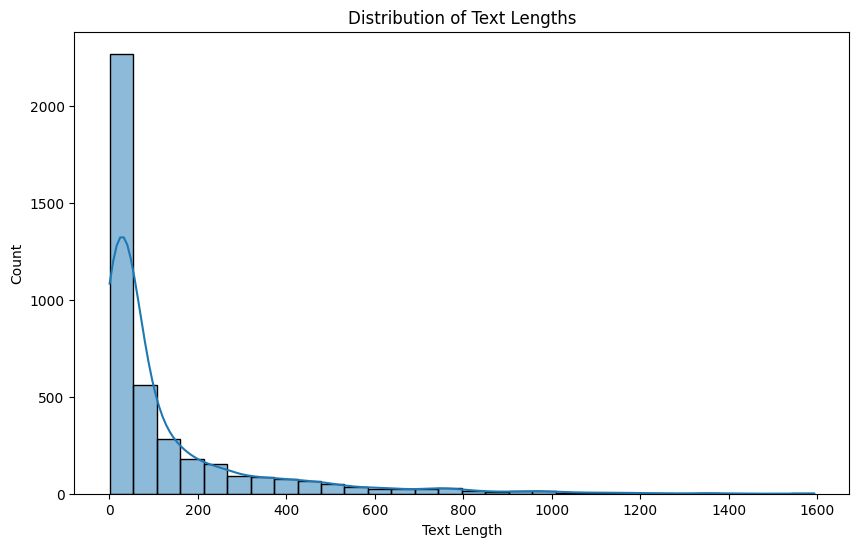

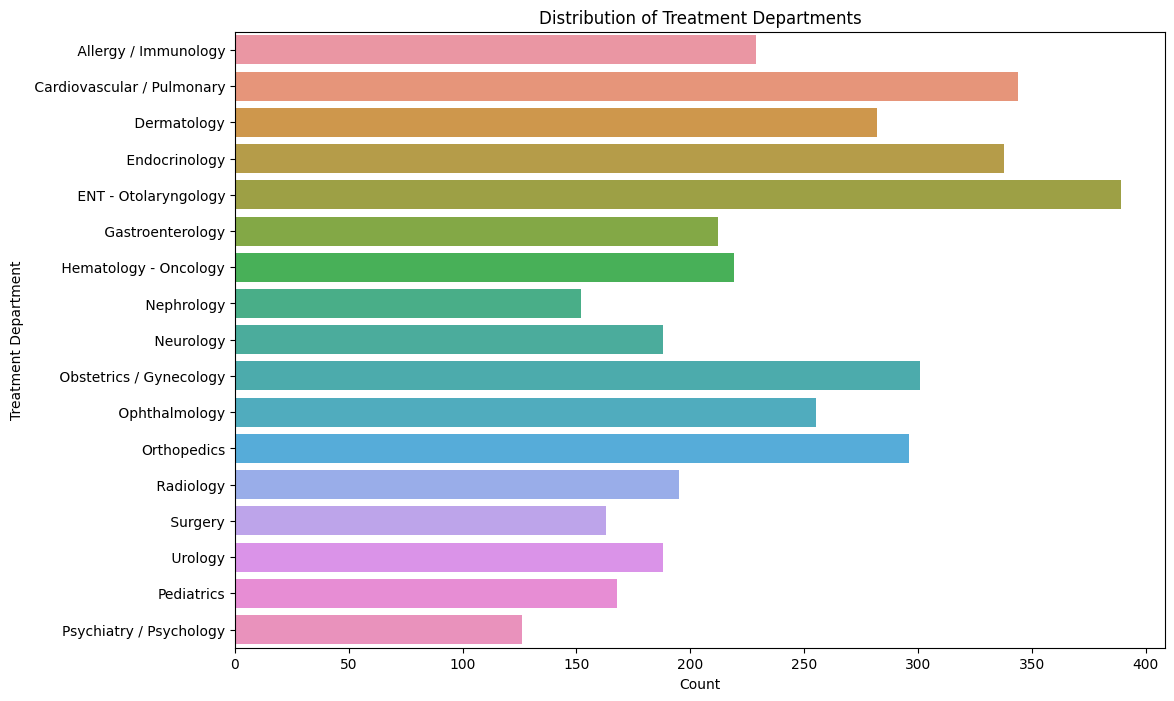

In [ ]:
# Install necessary libraries
# !pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics of the text lengths
df['text_length'] = df['cases'].apply(lambda x: len(x.split()))
print("\nBasic Statistics of Text Lengths:")
print(df['text_length'].describe())

# Visualize the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of treatment departments
plt.figure(figsize=(12, 8))
sns.countplot(y='department', data=df)
plt.title('Distribution of Treatment Departments')
plt.xlabel('Count')
plt.ylabel('Treatment Department')
plt.show()


In [ ]:
# Install necessary libraries
# !pip install pandas transformers

import pandas as pd
from transformers import BertTokenizer,AutoTokenizer

# Load raw data
data_path = '/content/drive/MyDrive/Senior_codes/cleaned_data.csv'
df = pd.read_csv(data_path)

# Remove irrelevant information
df = df[['cases', 'department']]
df = df.dropna()
df['cases'] = df['cases'].str.lower()

# Choose a tokenizer (assuming BioBERT)
tokenizer_name = 'dmis-lab/biobert-base-cased-v1.1'  # Use the public version on Hugging Face
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, use_fast=True)

# Tokenize your text
df['tokenized_text'] = df['cases'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# Save the tokenized data to a new CSV file
tokenized_data_path = '/content/drive/MyDrive/Senior_codes/tokenized_data.csv'
df.to_csv(tokenized_data_path, index=False)
print(f"\nTokenized data saved to {tokenized_data_path}")



Tokenized data saved to /content/drive/MyDrive/Senior_codes/tokenized_data.csv


In [ ]:
# Install necessary libraries
# !pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the treatment_department labels
df['encoded_labels'] = label_encoder.fit_transform(df['department'])

# Display the mapping of original labels to encoded labels
label_mapping = dict(zip(df['department'], df['encoded_labels']))
print("\nLabel Mapping:")
print(label_mapping)

# Print the first few rows of the DataFrame with encoded labels
print("\nDataFrame with Encoded Labels:")
print(df[['cases', 'department', 'encoded_labels']].head())

# Save the DataFrame with encoded labels to a new CSV file
encoded_csv_path = '/content/drive/MyDrive/Senior_codes/encoded_data.csv'
df.to_csv(encoded_csv_path, index=False)
print(f"\nDataFrame with Encoded Labels saved to {encoded_csv_path}")



Label Mapping:
{' Allergy / Immunology': 0, ' Cardiovascular / Pulmonary': 1, ' Dermatology': 2, ' Endocrinology': 4, ' ENT - Otolaryngology': 3, ' Gastroenterology': 5, ' Hematology - Oncology': 6, ' Nephrology': 7, ' Neurology': 8, ' Obstetrics / Gynecology': 9, ' Ophthalmology': 10, 'Orthopedics': 14, ' Radiology': 11, ' Surgery': 12, ' Urology': 13, 'Pediatrics': 15, 'Psychiatry / Psychology': 16}

DataFrame with Encoded Labels:
                                               cases             department  \
0  history:,  a 55-year-old female presents self-...   Allergy / Immunology   
1  admitting diagnosis: , kawasaki disease.,disch...   Allergy / Immunology   
2  history: , a 34-year-old male presents today s...   Allergy / Immunology   
3  history:,  i had the pleasure of meeting and e...   Allergy / Immunology   
4  subjective:,  this 23-year-old white female pr...   Allergy / Immunology   

   encoded_labels  
0               0  
1               0  
2               0  
3      

In [ ]:
# Install necessary library
import torch
from torch.utils.data import TensorDataset, random_split
import pandas as pd
from transformers import BertTokenizer
from sklearn.utils import shuffle  # Import shuffle from scikit-learn

# Define the encode_data function
def encode_data(tokenizer, texts, max_length):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            truncation=True,
            padding='max_length',
            max_length=max_length,
            return_tensors='pt'  # return PyTorch tensors
        )
        input_ids.append(encoded["input_ids"])
        attention_masks.append(encoded["attention_mask"])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Load your data
data_path = '/content/drive/MyDrive/Senior_codes/encoded_data.csv'
df = pd.read_csv(data_path)

# Shuffle the DataFrame
df = shuffle(df, random_state=42)

# ... (Previous code for cleaning and label encoding)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the max sequence length
max_length = 512

# Encode the data using the function
input_ids, attention_mask = encode_data(tokenizer, df['cases'].tolist(), max_length)

# Convert encoded_labels to tensors
labels = torch.tensor(df['encoded_labels'].tolist())

# Create TensorDataset
dataset = TensorDataset(input_ids, attention_mask, labels)

# Split the dataset into training and validation sets (80% training, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Save the training and validation datasets to new CSV files
train_df = pd.DataFrame({
    'input_ids': [item[0].tolist() for item in train_dataset],
    'attention_mask': [item[1].tolist() for item in train_dataset],
    'encoded_labels': [item[2].item() for item in train_dataset]
})

val_df = pd.DataFrame({
    'input_ids': [item[0].tolist() for item in val_dataset],
    'attention_mask': [item[1].tolist() for item in val_dataset],
    'encoded_labels': [item[2].item() for item in val_dataset]
})


train_csv_path = '/content/drive/MyDrive/Senior_codes/train_dataset.csv'
val_csv_path = '/content/drive/MyDrive/Senior_codes/val_dataset.csv'

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)

print(f"Training dataset saved to {train_csv_path}")
print(f"Validation dataset saved to {val_csv_path}")


KeyboardInterrupt: ignored

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertForSequenceClassification, AdamW, BertTokenizer
from tqdm import tqdm
import torch
import pandas as pd
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments


In [ ]:
!python -m torch.hub.download_state_of_the_art_model('biobert-base-uncased', map_location=torch.device('cuda'))


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `python -m torch.hub.download_state_of_the_art_model('biobert-base-uncased', map_location=torch.device('cuda'))'


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",  # Replace with the model name supporting 17 classes
    num_labels=17
)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(model.config)

# Get the number of output neurons in the classification head
num_output_neurons = model.config.num_labels
print("Number of output neurons:", num_output_neurons)

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
    "LABEL_13": 13,
    "LABEL_14": 14,
    "LABEL_15": 15,
    "LABEL_16": 16,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "

In [ ]:
# Define optimizer and learning rate

optimizer = AdamW(model.parameters(), lr=1e-5)


In [ ]:
train_csv_path = '/content/drive/MyDrive/Senior_codes/train_dataset.csv'
train_df = pd.read_csv(train_csv_path)


In [ ]:
# Convert 'input_ids', 'attention_mask', and 'encoded_labels' columns to tensors
input_ids = torch.tensor([eval(ids) for ids in train_df['input_ids']])
attention_mask = torch.tensor([eval(mask) for mask in train_df['attention_mask']])
labels = torch.tensor(train_df['encoded_labels'].tolist())

In [ ]:
# Create TensorDataset
train_dataset = TensorDataset(input_ids, attention_mask, labels)
# Define DataLoader for training set
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


In [ ]:
pip install transformers -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
# Number of training epochs
num_epochs = 10
# Early stopping parameters
#early_stop_counter = 0
#early_stop_threshold = 3

In [ ]:

best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    total_loss = 0.0
    tqdm_dataloader = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)

    for batch_idx, batch in enumerate(tqdm_dataloader):
        input_ids, attention_mask, labels = batch

        # Adjust label indices (subtract 1)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}: Average Training Loss: {average_loss}')


Epoch 1/10:   0%|          | 0/203 [00:00<?, ?it/s]

In [ ]:
import torch
import time
import tqdm

for epoch in range(num_epochs):
    model.train()
    epoch_start_time = time.time()
    epoch_loss = 0.0


    for batch_start in data_loader:
        batch_end = batch_start + batch_size
        input_ids_batch = input_ids[batch_start:batch_end]
        attention_mask_batch = attention_mask[batch_start:batch_end]
        labels_batch = labels[batch_start:batch_end]

        # Forward pass (mimicking model prediction)
        outputs = model(input_ids_batch, attention_mask_batch)

        # Calculate loss
        loss = criterion(outputs, labels_batch)
        epoch_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        data_loader.set_postfix({'Loss': loss.item()})




   # model = AutoModelForSequenceClassification.from_pretrained('dmis-lab/biobert-v1.1', num_labels=len(set(df['encoded_labels'])))
# Define training arguments
# training_args = TrainingArguments(
#     output_dir='./results',
#     num_train_epochs=3,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=64,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir='./logs',
#     full_determinism=True,
# )
# Create Trainer and start training
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
# )


    # Calculate and print average loss for the epoch
    average_epoch_loss = loss_scaled / len(data_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_epoch_loss:.4f}")

    epoch_end_time = time.time()
    epoch_time = epoch_end_time - epoch_start_time
    print(f"Epoch {epoch + 1}/{num_epochs}, Time: {epoch_time:.2f}s")

Epoch 1/10: 100%|██████████| 3/3 [00:09<00:00,  3.22s/batch, Loss=4]


Epoch 1/10, Average Loss: 1.3321
Epoch 1/10, Time: 9.66s


Epoch 2/10: 100%|██████████| 3/3 [00:11<00:00,  3.78s/batch, Loss=1.02]


Epoch 2/10, Average Loss: 0.3395
Epoch 2/10, Time: 11.34s


Epoch 3/10: 100%|██████████| 3/3 [00:10<00:00,  3.39s/batch, Loss=0.352]


Epoch 3/10, Average Loss: 0.1174
Epoch 3/10, Time: 10.17s


Epoch 4/10: 100%|██████████| 3/3 [00:11<00:00,  3.68s/batch, Loss=2.39]


Epoch 4/10, Average Loss: 0.7970
Epoch 4/10, Time: 11.06s


Epoch 5/10: 100%|██████████| 3/3 [00:15<00:00,  5.26s/batch, Loss=1.67]


Epoch 5/10, Average Loss: 0.5560
Epoch 5/10, Time: 15.78s


Epoch 6/10: 100%|██████████| 3/3 [00:15<00:00,  5.08s/batch, Loss=1.14]


Epoch 6/10, Average Loss: 0.3812
Epoch 6/10, Time: 15.25s


Epoch 7/10: 100%|██████████| 3/3 [00:10<00:00,  3.65s/batch, Loss=2.2]


Epoch 7/10, Average Loss: 0.7330
Epoch 7/10, Time: 10.95s


Epoch 8/10: 100%|██████████| 3/3 [00:11<00:00,  3.70s/batch, Loss=1.85]


Epoch 8/10, Average Loss: 0.6179
Epoch 8/10, Time: 11.12s


Epoch 9/10: 100%|██████████| 3/3 [00:13<00:00,  4.59s/batch, Loss=0.145]


Epoch 9/10, Average Loss: 0.0483
Epoch 9/10, Time: 13.76s


Epoch 10/10: 100%|██████████| 3/3 [00:14<00:00,  4.69s/batch, Loss=2.12]

Epoch 10/10, Average Loss: 0.7065
Epoch 10/10, Time: 14.09s


In [ ]:
pip install accelerate -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 1.3 MB/s eta 0:00:00
